# This is Franzi's file

In [1]:
#Import Pandas, matplotlip and seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
orders_raw = pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=0)
on_truck_raw =pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=1)
pickup_raw = pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=2)
delivered_raw = pd.read_excel("./Muesli Project raw data.xlsx", sheet_name=3)

Pseudocode:

- Load in all the data in different data frames
- clear data to have only relevant date (drop customer name), and make sure data types are the ones we need, drop duplicates


- merge on_truck_raw & pickup_raw with outer merge - check if "on truck scan date" and "ready to ship" are the same dates, if yes combine both columns
- inner merge between orders_raw and delivered_raw to have the  overall time from ordering to delivered - calculate average in time difference (Overall Process)
- inner merge between orders_raw and pickup_raw to receive the timeframe between order and ready to ship (Leaving Warehouse)
- inner merge merged ready to ship data (first merging point here) with delivered_raw, to get shipping time (Shipping)
- inner merge between orders_raw and on_truck_raw inner to get processing time (Processing)

In [21]:
print(orders_raw.info())
orders_raw.head(2)
orders_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Origin Channel  9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Sale

5009

In [22]:
print(on_truck_raw.info())
on_truck_raw.head(2)
on_truck_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              5899 non-null   int64         
 1   Order ID            5899 non-null   object        
 2   Order Date          5899 non-null   datetime64[ns]
 3   On Truck Scan Date  5899 non-null   datetime64[ns]
 4   Ship Mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB
None


3002

In [23]:
print(pickup_raw.info())
pickup_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            290 non-null    object        
 1   Ready to Ship Date  290 non-null    datetime64[ns]
 2   Pickup Date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB
None


204

In [24]:
delivered_raw.info()
delivered_raw['Order ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           333 non-null    object        
 1   Arrival Scan Date  333 non-null    datetime64[ns]
 2   Customer Name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


333

## Cleaning Data

In [41]:
def clean_column_drop_dupl(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_")
    df = df.drop_duplicates(['order_id'])
    return df

#def drop_dupl_orderid(df):
 #   df = df.drop_duplicates(['order_id'])
  #  return df


In [42]:
orders_clean = clean_column_drop_dupl(orders_raw)
on_truck_clean = clean_column_drop_dupl(on_truck_raw)
pickup_clean = clean_column_drop_dupl(pickup_raw)
delivered_clean = clean_column_drop_dupl(delivered_raw)

In [51]:
#dropping columns
orders_clean.drop(['index', 'customer_name'], axis=1, inplace = True)
orders_clean.head(2)

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1805/629526611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean.drop(['index', 'customer_name'], axis=1, inplace = True)


,order_id,order_date,ship_mode,customer_id,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,CA-2019-118255,2019-03-11,First Class,ON-18715,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714


In [52]:
#dropping column
on_truck_clean.drop(['row_id'], axis=1, inplace = True)
on_truck_clean.head(2)

/var/folders/mc/1x4q7cs53knf6dvx4qb6jlg80000gn/T/ipykernel_1805/3560231959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_truck_clean.drop(['row_id'], axis=1, inplace = True)


,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing
1,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing


In [63]:
#dropping customer name
delivered_clean.drop(['customer_name'], axis=1, inplace = True)
delivered_clean

,order_id,arrival_scan_date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


## Merges

- merge on_truck_clean & pickup_clean with outer merge - check if "on truck scan date" and "ready to ship" are the same dates, if yes combine both columns
- inner merge between orders_clean and delivered_clean to have the  overall time from ordering to delivered - calculate average in time difference (Overall Process)
- inner merge between orders_clean and on_truck_clean inner to get processing time (Processing)
- inner merge between orders_clean and pickup_clean to receive the timeframe between order and ready to ship (Leaving Warehouse)
- inner merge merged ready to ship data (first merging point here) with delivered_clean, to get shipping time (Shipping)


In [59]:
#merge on_truck_clean and pickup_clean
pickup_truck = on_truck_clean.merge(pickup_clean, how= "outer", on="order_id")
pickup_truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   order_date          3002 non-null   datetime64[ns]
 2   on_truck_scan_date  3002 non-null   datetime64[ns]
 3   ship_mode           3002 non-null   object        
 4   ready_to_ship_date  204 non-null    datetime64[ns]
 5   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](4), object(2)
memory usage: 140.8+ KB


In [58]:
#check, if column on_truck_scan_date and pickup_date have the same entries
#create new column with difference between on_truck_scan_date and pickup_date
pickup_truck_comp = on_truck_clean.merge(pickup_clean, how= "inner", on="order_id")
pickup_truck_comp['date_difference'] = pickup_truck_comp['on_truck_scan_date'] - pickup_truck_comp['pickup_date']
pickup_truck_comp['date_difference'].value_counts() # only one difference, which is 0 days! both columns are the same!


date_difference
0 days    204
Name: count, dtype: int64

In [60]:
#dropping pickup date (doubled column)
pickup_truck.drop(['pickup_date'], axis = 1, inplace = True)
pickup_truck.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date
0,CA-2020-126221,2020-12-30,2021-01-06,Standard Processing,NaT
1,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing,NaT


Inner merge between orders_clean and delivered_clean to have the  overall time from ordering to delivered - calculate average in time difference (Overall Process)

In [64]:
delivery = orders_clean.merge(delivered_clean, how = "inner", on="order_id")
delivery.head(2)

,order_id,order_date,ship_mode,customer_id,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date
0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Email,United States,San Diego,California,92037.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13,0.0,636.0003,2019-09-23
1,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Sales,United States,Hesperia,California,92345.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10001908,99.99,1,0.0,34.9965,2019-05-06


In [72]:
delivery['order_arrival_difference'] = delivery['arrival_scan_date'] - delivery['order_date']
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   order_id                  333 non-null    object         
 1   order_date                333 non-null    datetime64[ns] 
 2   ship_mode                 333 non-null    object         
 3   customer_id               333 non-null    object         
 4   origin_channel            333 non-null    object         
 5   country/region            333 non-null    object         
 6   city                      333 non-null    object         
 7   state                     333 non-null    object         
 8   postal_code               333 non-null    float64        
 9   region                    333 non-null    object         
 10  category                  333 non-null    object         
 11  sub-category              333 non-null    object         
 12  product_

In [79]:
average_delivery = (delivery['order_arrival_difference'].sum()/delivery['order_arrival_difference'].count()).round('d')
average_delivery

Timedelta('11 days 00:00:00')

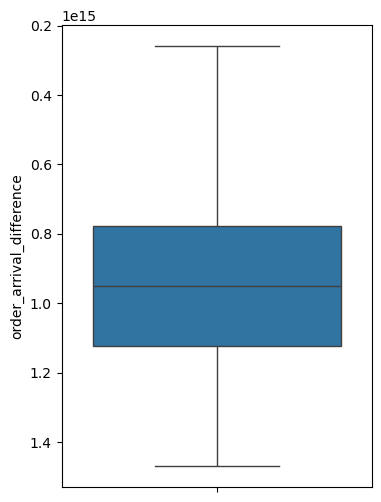

In [84]:
plt.subplots(figsize = (4,6))

sns.boxplot(data=delivery['order_arrival_difference']); #?? Was ist hier schief, wie bekommen wir hier eine schönere Darstellung??

Inner merge between orders_clean and on_truck_clean inner to get processing time (Processing)

In [86]:
pickup_truck_comp.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,date_difference
0,US-2020-165456,2020-11-30,2020-12-04,Express,2020-12-03,2020-12-04,0 days
1,CA-2020-119305,2020-11-30,2020-12-07,Standard Processing,2020-12-04,2020-12-07,0 days


In [88]:
pickup_truck_comp['process_time'] = pickup_truck_comp['ready_to_ship_date'] - pickup_truck_comp['order_date']
pickup_truck_comp.value_counts('process_time')

process_time
5 days    44
4 days    39
6 days    37
2 days    24
3 days    20
7 days    18
0 days    16
1 days     4
8 days     2
Name: count, dtype: int64

In [99]:
pickup_truck_comp.groupby(['ship_mode']).agg({'process_time':'mean'})

#df_category_views = df.groupby(['category_name']).agg({'views':'mean'}).sort_values('views', ascending=True)

,process_time
ship_mode,
Express,2 days 00:54:20.377358490
Standard Processing,4 days 22:15:05.960264900
